# Combining Three Datasets into One

### Imports

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder


## Load the Three Datasets

In [3]:
# Load the cleaned datasets from S3
# Load cust_seg_df from S3
custseg_trans = pd.read_csv('s3://team6datasets/transformedDatasets/custseg_trans.csv')

# Load markcamp_clean from S3
markcamp_trans = pd.read_csv('s3://team6datasets/transformedDatasets/markcamp_trans.csv')

# Load onlineretal_clean from S3
onlineretail_trans = pd.read_csv('s3://team6datasets/transformedDatasets/onlineretail_trans.csv')

## Combine datasets

In [4]:
# Combine the datasets
customerinfo_df = pd.merge(custseg_trans, markcamp_trans, on='CustomerID', how='inner')

In [5]:
# Perform inner merge based on 'CustomerID'
customer_sales_df = pd.merge(customerinfo_df, onlineretail_trans, on='CustomerID', how='inner')

## Data Cleaning/Scrubbing

In [6]:
customer_sales_df.head(10)

,CustomerID,first_name,last_name,title,gender,email,company_name,department,job_title,job_category,...,time_zone,ip_address,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,536532,21520,BOOZE & WOMEN GREETING CARD,12,2010-12-01 13:24:00,0.42,Norway,5.04
1,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,537648,22555,PLASTERS IN TIN STRONGMAN,12,2010-12-07 15:48:00,1.65,United Kingdom,19.80
2,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,537855,84580,MOUSE TOY WITH PINK T-SHIRT,2,2010-12-08 15:59:00,3.75,United Kingdom,7.50
3,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,538208,22110,BIRD HOUSE HOT WATER BOTTLE,1,2010-12-10 11:39:00,2.55,United Kingdom,2.55
4,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,538529,22837,HOT WATER BOTTLE BABUSHKA,4,2010-12-13 10:24:00,4.65,United Kingdom,18.60
5,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,539636,22652,TRAVEL SEWING KIT,20,2010-12-20 15:15:00,1.65,Germany,33.00
6,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,539675,22807,SET OF 6 T-LIGHTS TOADSTOOLS,12,2010-12-21 10:51:00,2.95,United Kingdom,35.40
7,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,540003,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-01-04 10:37:00,0.85,United Kingdom,10.20
8,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,541120,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,6,2011-01-14 09:13:00,2.10,France,12.60
9,4102,Fredric,Gascard,Dr,Female,fgascard6@bbb.org,Jabbersphere,Marketing,Geologist II,Science,...,Africa/Harare,114.190.66.122,542093,22961,JAM MAKING SET PRINTED,12,2011-01-25 12:46:00,1.45,United Kingdom,17.40


In [7]:
customer_sales_df.dtypes

CustomerID          int64
first_name         object
last_name          object
title              object
gender             object
email              object
company_name       object
department         object
job_title          object
job_category       object
language           object
university         object
linkedin_skill     object
Education          object
Income              int64
Kidhome             int64
Marital_Status     object
Teenhome            int64
Year_Birth          int64
city               object
country            object
country_code       object
region             object
latitude          float64
longitude         float64
phone              object
street_address     object
street_name        object
street_number       int64
street_suffix      object
time_zone          object
ip_address         object
InvoiceNo          object
StockCode          object
Description        object
Quantity            int64
InvoiceDate        object
UnitPrice         float64
Country     

In [8]:
# Check unique values in each column
unique_counts = customer_sales_df.nunique()
print(unique_counts)

CustomerID         2216
first_name         1945
last_name          2162
title                 6
gender                8
email              2216
company_name        381
department           12
job_title           195
job_category         22
language             97
university         1641
linkedin_skill     1854
Education             5
Income             2210
Kidhome               3
Marital_Status        8
Teenhome              3
Year_Birth           57
city               2106
country             153
country_code        153
region                7
latitude           2132
longitude          2130
phone              2216
street_address     2215
street_name         491
street_number      1257
street_suffix        21
time_zone           215
ip_address         2216
InvoiceNo         22190
StockCode          3684
Description        3896
Quantity            436
InvoiceDate       20460
UnitPrice           620
Country              37
TotalPrice         3878
dtype: int64


### Handle Missing values

In [9]:
# Check missing values
missing_counts = customer_sales_df.isnull().sum()
print(missing_counts)

CustomerID           0
first_name           0
last_name            0
title                0
gender               0
email                0
company_name         0
department           0
job_title            0
job_category      2594
language             0
university           0
linkedin_skill       0
Education            0
Income               0
Kidhome              0
Marital_Status       0
Teenhome             0
Year_Birth           0
city                 0
country              0
country_code         0
region               0
latitude             0
longitude            0
phone                0
street_address       0
street_name          0
street_number        0
street_suffix        0
time_zone            0
ip_address           0
InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
Country              0
TotalPrice           0
dtype: int64


In [10]:
# Filter the dataframe where 'job_category' is blank
blank_job_category_df = customer_sales_df[customer_sales_df['job_category'].isnull()]

# Extract the unique values of 'job_title' from the filtered dataframe
unique_job_titles = blank_job_category_df['job_title'].unique()

# Print the unique job titles
print(unique_job_titles)

['Nurse Practicioner']


In [11]:
# Fill the blank 'job_category' with 'Medical' where 'job_title' is 'Nurse Practicioner'
customer_sales_df.loc[customer_sales_df['job_title'] == 'Nurse Practicioner', 'job_category'] = customer_sales_df['job_category'].fillna('Healthcare')


In [12]:
# Check missing values
missing_counts = customer_sales_df.isnull().sum()
print(missing_counts)

CustomerID        0
first_name        0
last_name         0
title             0
gender            0
email             0
company_name      0
department        0
job_title         0
job_category      0
language          0
university        0
linkedin_skill    0
Education         0
Income            0
Kidhome           0
Marital_Status    0
Teenhome          0
Year_Birth        0
city              0
country           0
country_code      0
region            0
latitude          0
longitude         0
phone             0
street_address    0
street_name       0
street_number     0
street_suffix     0
time_zone         0
ip_address        0
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
TotalPrice        0
dtype: int64


### Check for Duplicate Rows

In [13]:
# Check for true duplicate rows in the DataFrame based on all columns
duplicate_rows = customer_sales_df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Retrieve the duplicate rows
duplicate_data = customer_sales_df[duplicate_rows]

# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 1


In [14]:
# Remove the duplicate row(s) from the DataFrame
customer_sales_df = customer_sales_df.drop_duplicates()

# Check dataset
customer_sales_df.shape

(406828, 40)

## Feature Creation

### Create 'Purchase_Frequency' Column

In [15]:
# Convert 'InvoiceDate' to datetime if it's not already in datetime format
customer_sales_df['InvoiceDate'] = pd.to_datetime(customer_sales_df['InvoiceDate'])

# Calculate purchase frequency using 'InvoiceNo'
purchase_frequency = customer_sales_df.groupby('CustomerID')['InvoiceNo'].nunique().rename('Purchase_Frequency')

# Merge the purchase frequency calculation based on 'InvoiceNo' directly into customer_sales_df
customer_sales_df = pd.merge(customer_sales_df, purchase_frequency, on='CustomerID', how='left')

In [16]:
# Describe the 'Purchase_Frequency' column to get statistics including min, max, and quartiles
purchase_frequency_description = customer_sales_df['Purchase_Frequency'].describe()

# Extract relevant statistics
purchase_frequency_min = purchase_frequency_description['min']
purchase_frequency_max = purchase_frequency_description['max']
purchase_frequency_quartiles = purchase_frequency_description[['25%', '50%', '75%']]

# Display the results
print("Minimum Purchase Frequency:", purchase_frequency_min)
print("Maximum Purchase Frequency:", purchase_frequency_max)
print("Purchase Frequency Quartiles:")
print(purchase_frequency_quartiles)


Minimum Purchase Frequency: 135.0
Maximum Purchase Frequency: 226.0
Purchase Frequency Quartiles:
25%    174.0
50%    183.0
75%    191.0
Name: Purchase_Frequency, dtype: float64


### Check for Central Tendancy and Outliers

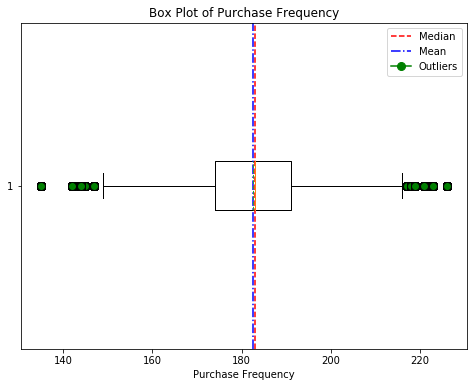

In [17]:
# Calculate mean and median
purchase_frequency_mean = customer_sales_df['Purchase_Frequency'].mean()
purchase_frequency_median = customer_sales_df['Purchase_Frequency'].median()

# Create a box plot for 'Purchase_Frequency' with mean, median, and outliers
plt.figure(figsize=(8, 6))
box = plt.boxplot(customer_sales_df['Purchase_Frequency'], vert=False, showmeans=True, 
                  meanline=True, showcaps=True, showbox=True, flierprops=dict(marker='o', markerfacecolor='g', markersize=8))
plt.axvline(purchase_frequency_median, color='r', linestyle='--', label='Median')
plt.axvline(purchase_frequency_mean, color='blue', linestyle='-.', label='Mean')

# Create custom legend entries for mean, median, and outliers
legend_entries = [plt.Line2D([0], [0], color='r', linestyle='--', label='Median'),
                  plt.Line2D([0], [0], color='blue', linestyle='-.', label='Mean'),
                  plt.Line2D([0], [0], marker='o', color='green', label='Outliers', markerfacecolor='green', markersize=8)]
plt.legend(handles=legend_entries)

plt.title('Box Plot of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.show()

### Create 'Age' Column

In [18]:
# Calculate age from 'Year_Birth'
current_year = pd.Timestamp.now().year
customer_sales_df['Age'] = current_year - customer_sales_df['Year_Birth']

In [19]:
# Describe the 'Age' column to get statistics including min, max, and quartiles
age_description = customer_sales_df['Age'].describe()

# Extract relevant statistics
age_min = age_description['min']
age_max = age_description['max']
age_quartiles = age_description[['25%', '50%', '75%']]

# Display the results
print("Minimum age:", age_min)
print("Maximum age:", age_max)
print("Age Quartiles:")
print(age_quartiles)


Minimum age: 28.0
Maximum age: 84.0
Age Quartiles:
25%    41.0
50%    56.0
75%    71.0
Name: Age, dtype: float64


### Check for Central Tendancy and Outliers

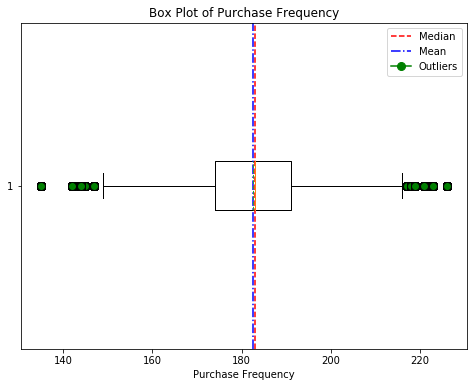

In [20]:
# Calculate mean and median for Purchase_Frequency
purchase_frequency_mean = customer_sales_df['Purchase_Frequency'].mean()
purchase_frequency_median = customer_sales_df['Purchase_Frequency'].median()

# Create a box plot for 'Purchase_Frequency' with mean, median, and outliers
plt.figure(figsize=(8, 6))
box = plt.boxplot(customer_sales_df['Purchase_Frequency'], vert=False, showmeans=True, 
                  meanline=True, showcaps=True, showbox=True, flierprops=dict(marker='o', markerfacecolor='g', markersize=8))
plt.axvline(purchase_frequency_median, color='r', linestyle='--', label='Median')
plt.axvline(purchase_frequency_mean, color='blue', linestyle='-.', label='Mean')

# Create custom legend entries for mean, median, and outliers
legend_entries = [plt.Line2D([0], [0], color='r', linestyle='--', label='Median'),
                  plt.Line2D([0], [0], color='blue', linestyle='-.', label='Mean'),
                  plt.Line2D([0], [0], marker='o', color='green', label='Outliers', markerfacecolor='green', markersize=8)]
plt.legend(handles=legend_entries)

plt.title('Box Plot of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.show()

### Create 'Total_Spent_byCustomer' Column

In [21]:
# Calculate total spending for each customer by summing up their 'TotalPrice'
total_spending = customer_sales_df.groupby('CustomerID')['TotalPrice'].sum().rename('Total_Spent_byCustomer')

# Merge the total spending information back into the original DataFrame
customer_sales_df = pd.merge(customer_sales_df, total_spending, on='CustomerID', how='left')

# Change negative values to positive in total spending
customer_sales_df['Total_Spent_byCustomer'] = customer_sales_df['Total_Spent_byCustomer'].abs()

In [22]:
# Describe the 'Total_Spent_byCustomer' column to get statistics including min, max, and quartiles
total_spending_description = customer_sales_df['Total_Spent_byCustomer'].describe()

# Extract relevant statistics
total_spending_min = total_spending_description['min']
total_spending_max = total_spending_description['max']
total_spending_quartiles = total_spending_description[['25%', '50%', '75%']]

# Display the results
print("Minimum Total Spending by Customer:", total_spending_min)
print("Maximum Total Spending by Customer:", total_spending_max)
print("Total Spending by Customer Quartiles:")
print(total_spending_quartiles)


Minimum Total Spending by Customer: 43.88000000000113
Maximum Total Spending by Customer: 173010.77
Total Spending by Customer Quartiles:
25%    3145.98
50%    3619.92
75%    4185.77
Name: Total_Spent_byCustomer, dtype: float64


### Check for Central Tendancy and Outliers

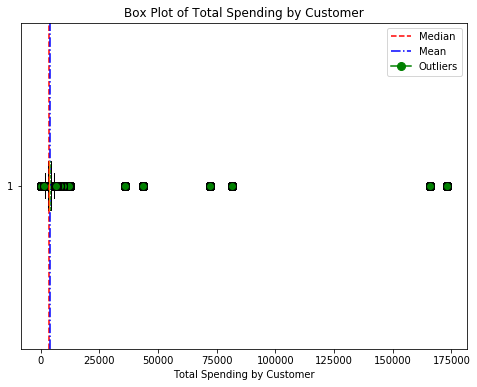

In [23]:
# Calculate mean and median for Total_Spent_byCustomer
total_spending_mean = customer_sales_df['Total_Spent_byCustomer'].mean()
total_spending_median = customer_sales_df['Total_Spent_byCustomer'].median()

# Create a box plot for 'Total_Spent_byCustomer' with mean, median, and outliers
plt.figure(figsize=(8, 6))
box = plt.boxplot(customer_sales_df['Total_Spent_byCustomer'], vert=False, showmeans=True, 
                  meanline=True, showcaps=True, showbox=True, flierprops=dict(marker='o', markerfacecolor='g', markersize=8))
plt.axvline(total_spending_median, color='r', linestyle='--', label='Median')
plt.axvline(total_spending_mean, color='blue', linestyle='-.', label='Mean')

# Create custom legend entries for mean, median, and outliers
legend_entries = [plt.Line2D([0], [0], color='r', linestyle='--', label='Median'),
                  plt.Line2D([0], [0], color='blue', linestyle='-.', label='Mean'),
                  plt.Line2D([0], [0], marker='o', color='green', label='Outliers', markerfacecolor='green', markersize=8)]
plt.legend(handles=legend_entries)

plt.title('Box Plot of Total Spending by Customer')
plt.xlabel('Total Spending by Customer')
plt.show()

### Create 'SpendingCategory' column based on 'Total_Spent_byCustomer' Column

In [24]:
# Define spending brackets based on the observed range of total spending
spending_bins = [0, 1000, 5000, 10000, float('inf')]
spending_labels = ['Low', 'Medium', 'High', 'Very High']

# Categorize total spending into spending brackets
customer_sales_df['SpendingCategory'] = pd.cut(customer_sales_df['Total_Spent_byCustomer'], bins=spending_bins, labels=spending_labels)


In [25]:
# Display count of each unique value in the 'SpendingCategory' column
spending_category_counts = customer_sales_df['SpendingCategory'].value_counts()

# Display the counts
print("Count of Each Spending Category:")
print(spending_category_counts)


Count of Each Spending Category:
Medium       365784
High          37375
Very High      1944
Low            1725
Name: SpendingCategory, dtype: int64


### Check for Central Tendancy

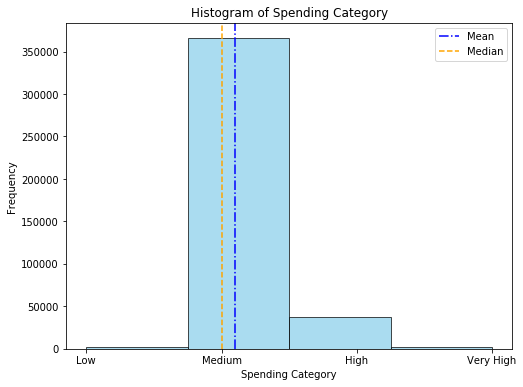

In [26]:
# Encode spending categories numerically
spending_category_numeric = customer_sales_df['SpendingCategory'].cat.codes

# Calculate mean and median for encoded spending categories
spending_category_mean = spending_category_numeric.mean()
spending_category_median = spending_category_numeric.median()

# Create a histogram for encoded spending categories
plt.figure(figsize=(8, 6))
plt.hist(spending_category_numeric, bins=len(spending_labels), color='skyblue', edgecolor='black', alpha=0.7)

# Add markers for mean and median
plt.axvline(spending_category_mean, color='blue', linestyle='-.', label='Mean')
plt.axvline(spending_category_median, color='orange', linestyle='--', label='Median')

# Set x-axis ticks and labels
plt.xticks(range(len(spending_labels)), spending_labels)

plt.title('Histogram of Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Frequency')

plt.legend()
plt.show()

### Create 'IncomeLevel' column based on 'Income' Column

In [27]:
# Define income brackets
income_bins = [0, 30000, 60000, 90000, float('inf')]
income_labels = ['Low', 'Medium', 'High', 'Very High']

# Categorize customers into income brackets
customer_sales_df['IncomeLevel'] = pd.cut(customer_sales_df['Income'], bins=income_bins, labels=income_labels)


In [28]:
# Display count of each unique value in the 'IncomeLevel' column
income_level_counts = customer_sales_df['IncomeLevel'].value_counts()

# Display the counts
print("Count of Each Income Level:")
print(income_level_counts)


Count of Each Income Level:
Very High    355651
Medium        17893
High          17109
Low           16175
Name: IncomeLevel, dtype: int64


### Check for Central Tendancy

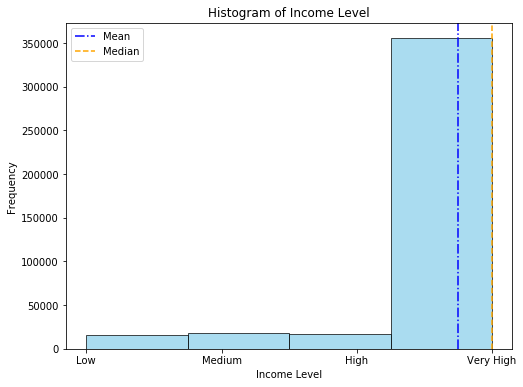

In [29]:
# Calculate mean and median for 'IncomeLevel'
income_level_mean = customer_sales_df['IncomeLevel'].cat.codes.mean()
income_level_median = customer_sales_df['IncomeLevel'].cat.codes.median()

# Create a histogram for 'IncomeLevel' with original category labels on x-axis
plt.figure(figsize=(8, 6))
plt.hist(customer_sales_df['IncomeLevel'].cat.codes, bins=len(income_labels), color='skyblue', edgecolor='black', alpha=0.7)

# Add markers for mean and median
plt.axvline(income_level_mean, color='blue', linestyle='-.', label='Mean')
plt.axvline(income_level_median, color='orange', linestyle='--', label='Median')

# Set x-axis ticks and labels
plt.xticks(range(len(income_labels)), income_labels)

plt.title('Histogram of Income Level')
plt.xlabel('Income Level')
plt.ylabel('Frequency')

plt.legend()
plt.show()

### Create 'Purchase_Recency' Column

In [30]:
# Group by 'CustomerID' and find distinct invoice dates for each customer
distinct_purchase_dates = customer_sales_df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.max().normalize())

# Calculate the current date
current_date = pd.Timestamp.now().normalize()  # Normalizing to remove timestamp

# Calculate the difference between the current date and the latest purchase date to get recency
purchase_recency = (current_date - distinct_purchase_dates).dt.days

# Create the 'Purchase_Recency' column
customer_sales_df['Purchase_Recency'] = customer_sales_df['CustomerID'].map(purchase_recency)

# Convert numerical recency to datetime format
customer_sales_df['Purchase_Recency_Date'] = current_date - pd.to_timedelta(customer_sales_df['Purchase_Recency'], unit='D')

# Remove the time component from the 'Purchase_Recency_Date' column
customer_sales_df['Purchase_Recency_Date'] = customer_sales_df['Purchase_Recency_Date'].dt.date

In [31]:
# Count the number of unique dates in the 'Purchase_Recency_Date' column
unique_purchase_recency_dates_count = customer_sales_df['Purchase_Recency_Date'].nunique()

# Display the count
print("Count of Unique Purchase Recency Dates:", unique_purchase_recency_dates_count)

Count of Unique Purchase Recency Dates: 9


## Drop unwanted columns

In [32]:
columns_to_remove = ['first_name', 'last_name', 'title', 'job_title', 'email', 'company_name', 'university', 'linkedin_skill', 
                    'latitude', 'longitude', 'Income', 'phone', 'city', 'country', 'Country', 'country_code', 'street_address', 
                     'street_name', 'street_number', 'street_suffix', 'ip_address', 'time_zone', 'InvoiceNo', 'StockCode', 
                    'Description', 'InvoiceDate', 'UnitPrice', 'TotalPrice', 'Purchase_Recency', 'Quantity', 'Purchase_Recency_Date']

# Drop the specified columns
customer_sales_df.drop(columns=columns_to_remove, inplace=True)

## Check number of unique values in each column 

In [33]:
# Check unique values in each column
unique_counts = customer_sales_df.nunique()
print(unique_counts)

CustomerID                2216
gender                       8
department                  12
job_category                22
language                    97
Education                    5
Kidhome                      3
Marital_Status               8
Teenhome                     3
Year_Birth                  57
region                       7
Purchase_Frequency          80
Age                         57
Total_Spent_byCustomer    2214
SpendingCategory             4
IncomeLevel                  4
dtype: int64


In [34]:
# Display Shape
customer_sales_df.shape

(406828, 16)

## Encode Categorical Features for Further Analysis

In [35]:
# Define the columns to encode
columns_to_encode = ['gender', 'department', 'job_category', 'language', 'Education', 
                     'Marital_Status', 'Kidhome', 'Teenhome', 'region', 'SpendingCategory', 
                     'IncomeLevel']

# Perform One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
coded_customer_sales_df = pd.get_dummies(customer_sales_df, columns=columns_to_encode)

# Display Shape
coded_customer_sales_df.shape

(406828, 178)

In [36]:
coded_customer_sales_df.dtypes

CustomerID                      int64
Year_Birth                      int64
Purchase_Frequency              int64
Age                             int64
Total_Spent_byCustomer        float64
                               ...   
SpendingCategory_Very High      uint8
IncomeLevel_Low                 uint8
IncomeLevel_Medium              uint8
IncomeLevel_High                uint8
IncomeLevel_Very High           uint8
Length: 178, dtype: object

## Apply Normalization

In [38]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns for scaling
numerical_columns = ['Year_Birth', 'Purchase_Frequency', 'Age', 'Total_Spent_byCustomer']

# Apply Min-Max scaling to the selected numerical columns
normalized_numerical_df = pd.DataFrame(scaler.fit_transform(customer_sales_df[numerical_columns]), 
                                       columns=numerical_columns)

# Concatenate the one-hot encoded DataFrame with the normalized numerical DataFrame
normal_cust_sales_df = pd.concat([coded_customer_sales_df, normalized_numerical_df], axis=1)

# Display Shape
print(normal_cust_sales_df.shape)

(406828, 182)
